In [1]:
import os
import copy
from typing import Dict, List

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader

from evaluate import evaluate, save_predictions, calculate_metrics
from metrics import calculate_dtw_distances, calculate_wasserstein_distance
from utils import create_spectrogram,create_combined_spectrogram

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
test_csv_path = "../data/test_data_stg7_clipped.csv"
wavelengths = np.load('../data/wavelengths.npy')


==== Evaluating model: edm_bs16_do0_cgt20_cg3_ns30_lr1e-3_0_e40_ed999 (edm) ====


Testing loop: 100%|█████████████████████████████████| 17811/17811 [4:25:01<00:00,  1.12it/s]


MSE error: 2612.671143
Mean Wasserstein Distance: 20.901820
Mean DTW Distance: 9504.935400


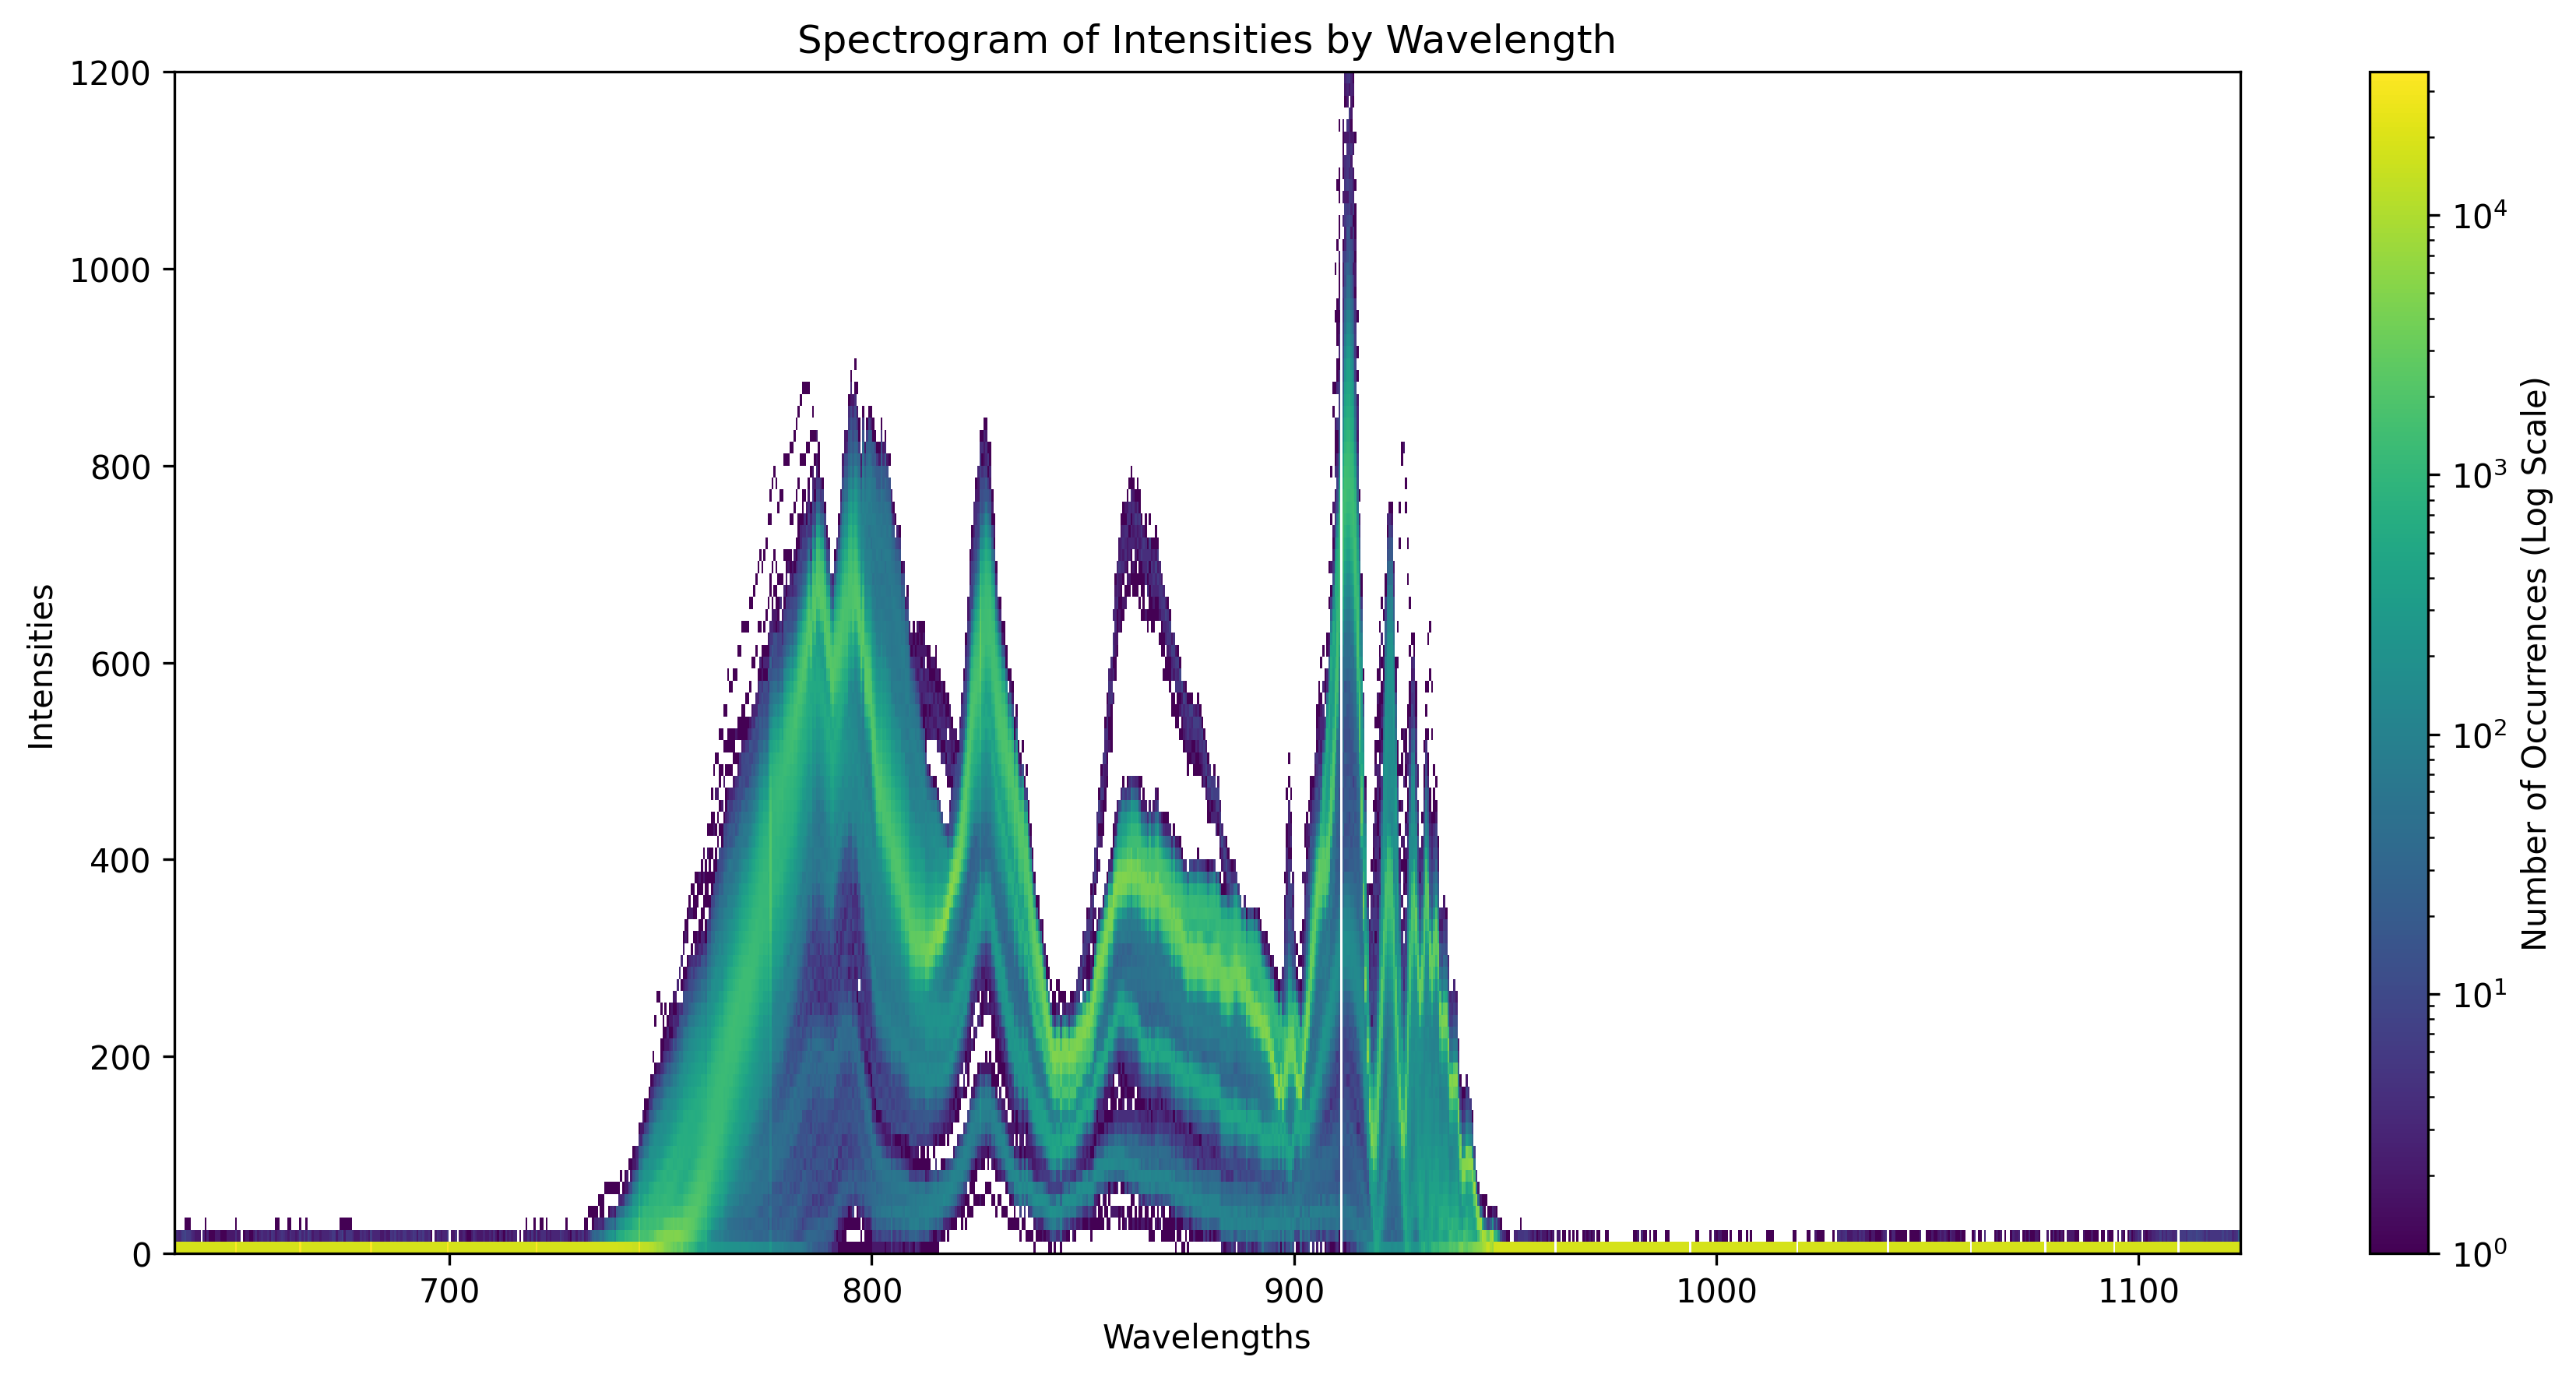

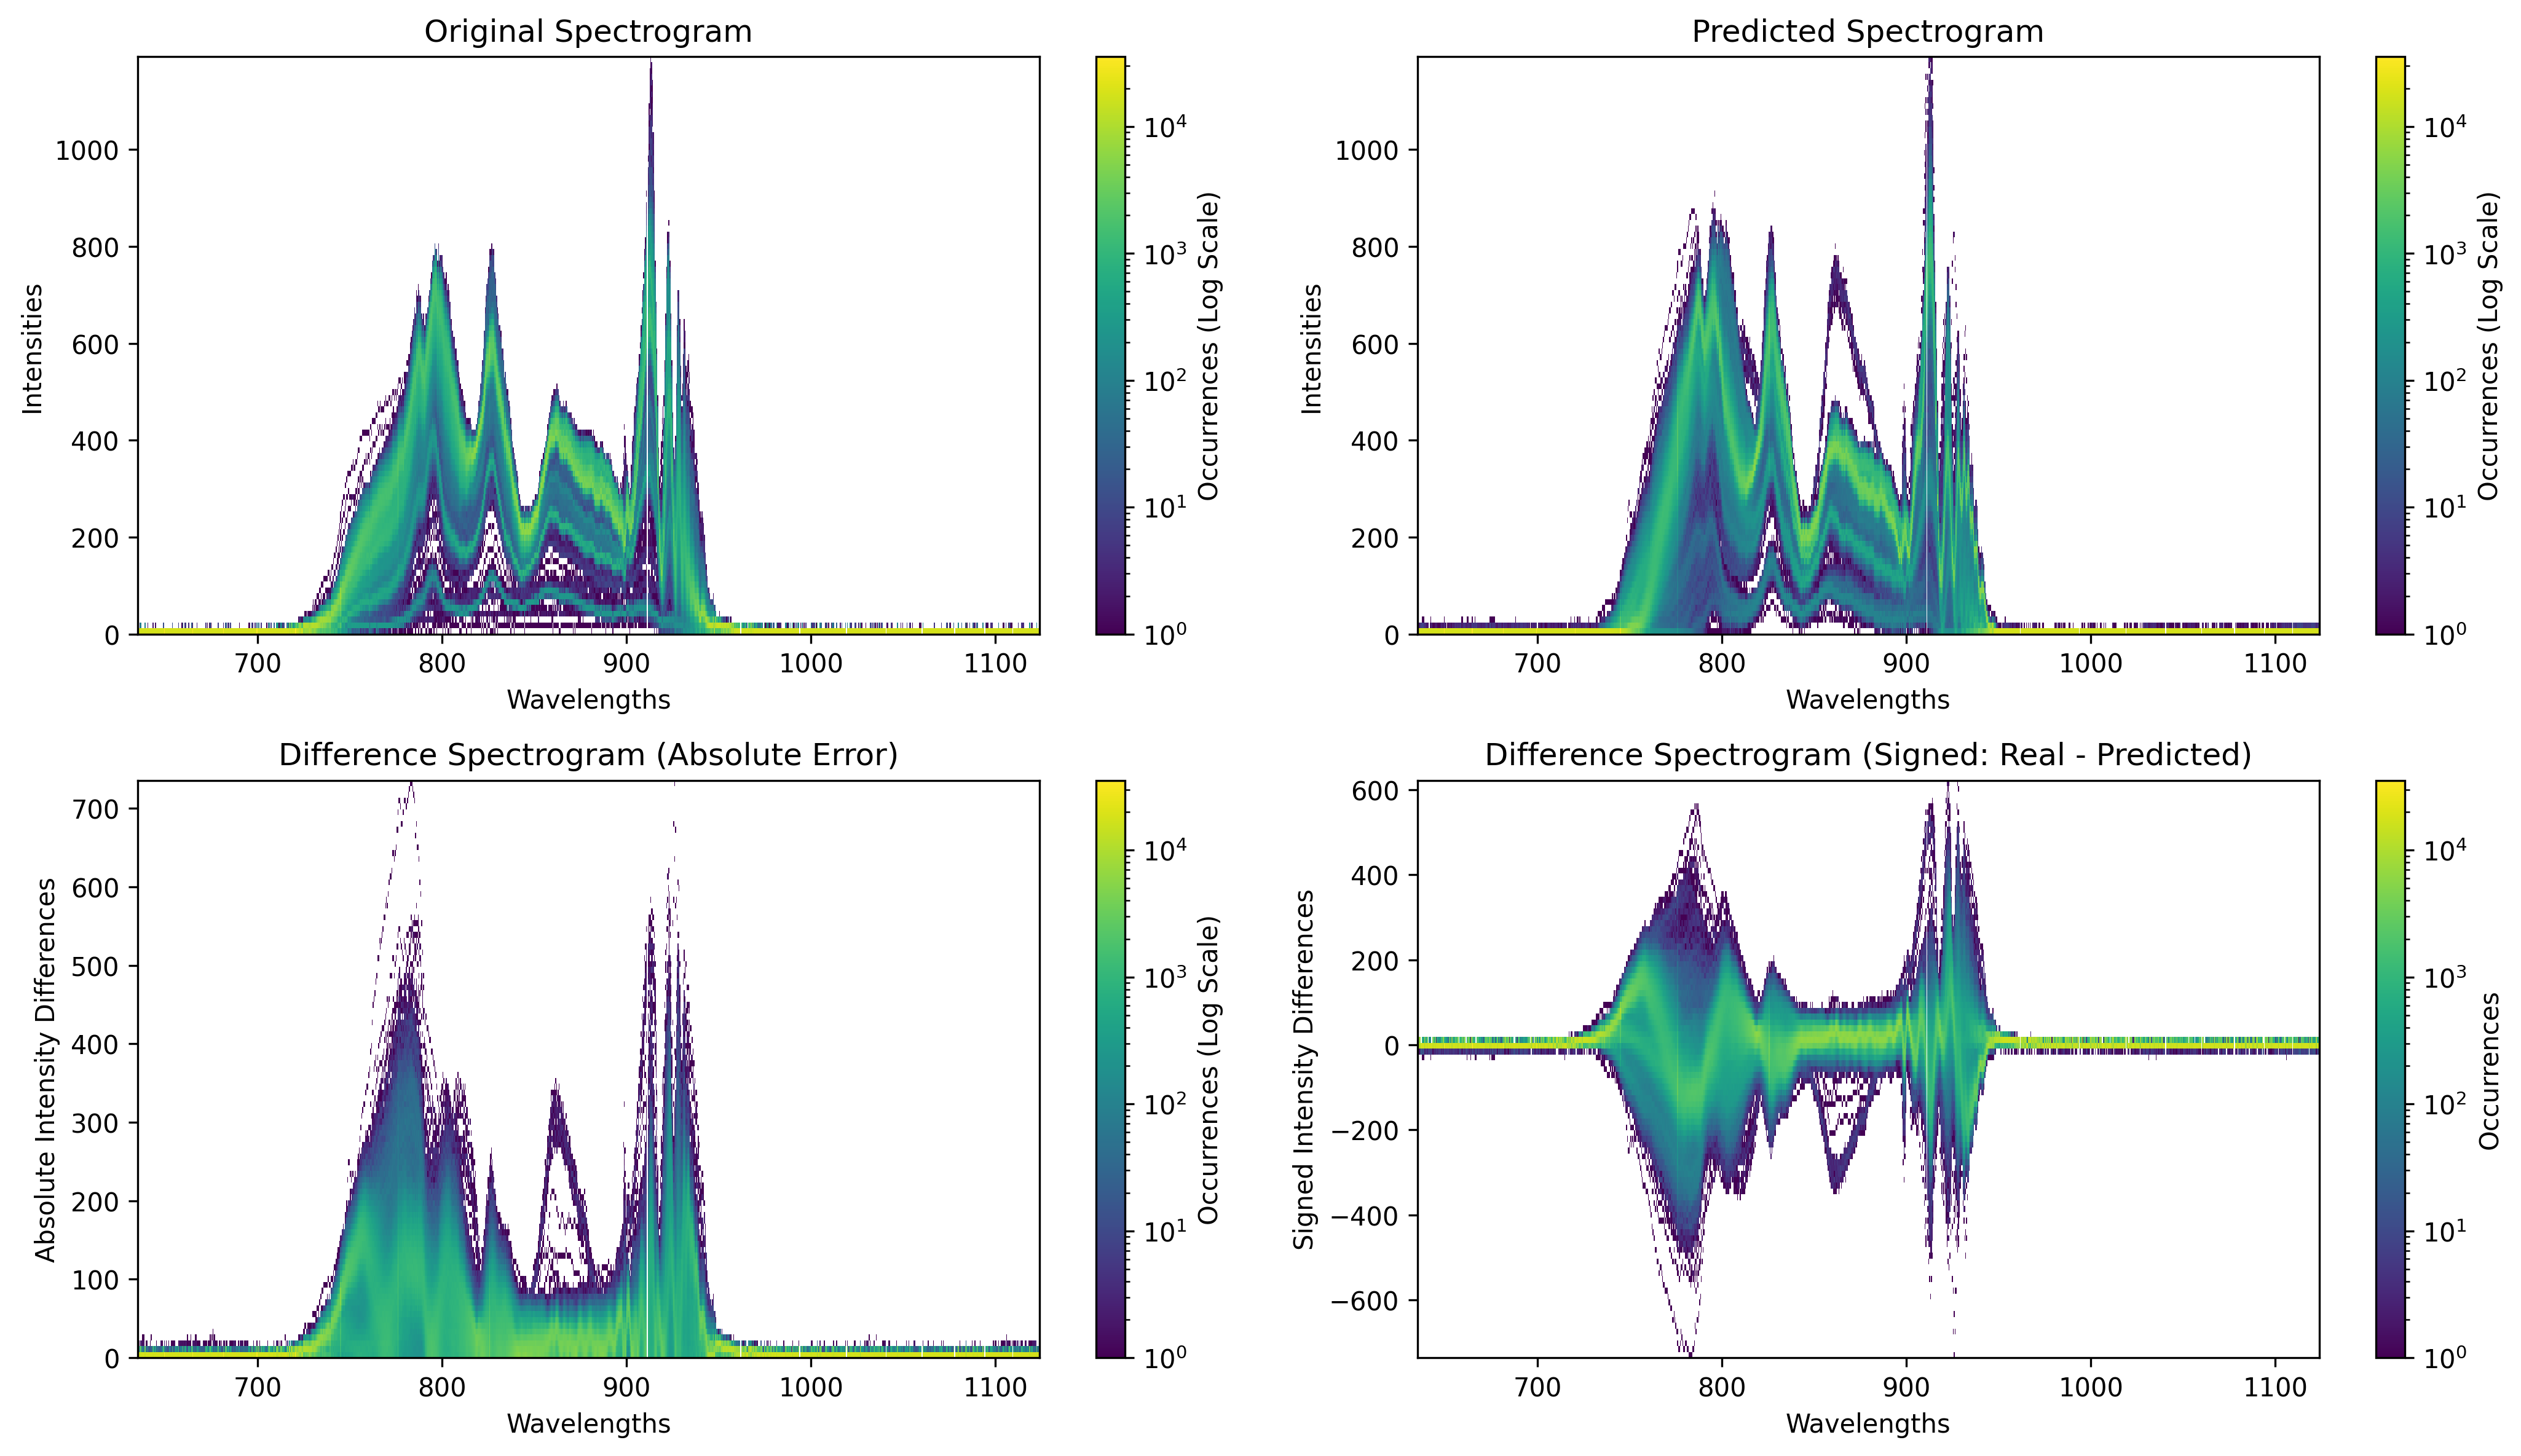

In [4]:
model_name = "edm_bs16_do0_cgt20_cg3_ns30_lr1e-3_0_e40_ed999"
epoch = 40
model_path = f"models/{model_name}/ema_ckpt40.pt"
s_type = "edm"

print(f"\n==== Evaluating model: {model_name} ({s_type}) ====")

# Run evaluation
x_real, cond_vectors, predictions = evaluate(
    device="cuda:0",
    test_csv_path=test_csv_path,
    model_path=model_path,
    n_samples=1,
    s_type=s_type,
    cfg_scale=2,
    noise_steps=30,
)

# Compute metrics
calculate_metrics(x_real, predictions)

create_spectrogram(wavelengths, predictions, label="Spectrogram of Intensities by Wavelength")
create_combined_spectrogram(wavelengths, 
                        x_real, 
                        predictions)

In [5]:
# Save predictions
predictions_path = os.path.join("predictions", model_name, f"preds_epoch{epoch}_cfg2_test_data.csv")
save_predictions(x_real, cond_vectors, predictions, predictions_path)

Predictions saved to predictions/edm_bs16_do0_cgt20_cg3_ns30_lr1e-3_0_e40_ed999/preds_epoch40_cfg2_test_data.csv


,x_real,cond_vectors,predictions
0,"0.0,0.0,0.0,6.81,10.17,0.0,0.74,0.0,3.6,6.82,5...","0.1299,-0.7678,0.2274,-1.4864,-1.0,-1.0,-0.351...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...."
1,"0.0,0.0,0.0,6.81,6.17,0.0,1.74,3.86,0.0,5.82,5...","0.1299,-0.7678,0.2274,-1.4563,-1.0,-1.0,-0.351...","2.6039958,3.3537624,2.8488278,3.7228706,3.6450..."
2,"0.77,0.0,0.0,5.81,6.17,0.0,1.74,0.86,0.0,5.82,...","0.1299,-0.7678,0.2165,-1.4203,-1.0,-1.0,-0.351...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...."
3,"0.0,0.0,0.0,2.81,4.17,0.0,6.74,1.86,0.6,8.82,7...","0.1299,-0.7678,0.2165,-1.4203,-1.0,-1.0,-0.351...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...."
4,"0.77,0.0,1.02,10.81,9.17,0.0,3.74,1.86,0.0,5.8...","0.1299,-0.7678,0.2061,-1.4203,-1.0,-1.0,-0.351...","4.5259595,3.184855,4.231882,4.962909,5.208671,..."
...,...,...,...
17806,"0.0,0.0,0.0,5.81,5.17,0.0,3.74,3.86,0.6,4.82,3...","-0.6418,0.2339,-0.4147,-1.0894,0.0,0.0,-1.6241...","0.8268714,0.0,0.0,0.21979809,0.0,0.0,0.0,0.0,0..."
17807,"0.0,0.0,0.0,6.81,6.17,0.0,1.74,0.0,2.6,5.82,4....","-0.6418,0.2339,-0.4147,-1.0894,0.0,0.0,-1.6241...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...."
17808,"0.0,0.0,0.0,8.81,5.17,0.0,3.74,5.86,2.6,4.82,3...","-0.6418,0.2339,-0.4147,-1.0894,0.0,0.0,-1.6241...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...."
17809,"0.0,0.0,0.0,0.0,6.17,0.0,4.74,2.86,0.0,6.82,4....","-0.6418,0.2339,-0.4147,-1.0894,0.0,0.0,-1.6241...","3.8135812,2.9578543,2.5475383,4.0780506,3.9376..."
